*Mid Project: Drug Performance Evaluation*

**Start to import all packages required in this project**

In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn.linear_model import LinearRegression
import plotly.express as px

**Read the CSV File using pandas library**

In [4]:
df = pd.read_csv('D:\AI\Epsilon_Data_Science\sessions\Sat_Group\Mid Project/Drug.csv')

In [5]:
df

,Condition,Drug,EaseOfUse,Effective,Form,Indication,Price,Reviews,Satisfaction,Type
0,Acute Bacterial Sinusitis,Amoxicillin,3.852353,3.655882,Capsule,On Label,12.590000,86.294118,3.197647,RX
1,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,3.470000,3.290000,Liquid (Drink),Off Label,287.370000,43.000000,2.590000,RX
2,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,3.121429,2.962857,Tablet,On Label,70.608571,267.285714,2.248571,RX
3,Acute Bacterial Sinusitis,Ampicillin,2.000000,3.000000,Capsule,On Label,12.590000,1.000000,1.000000,RX
4,Acute Bacterial Sinusitis,Ampicillin,3.250000,3.000000,Tablet,On Label,125.240000,15.000000,3.000000,RX
...,...,...,...,...,...,...,...,...,...,...
680,vulvovaginal candidiasis,Miconazole Nitrate,3.465000,2.770000,Cream,On Label,13.990000,19.500000,2.345000,RX/OTC
681,vulvovaginal candidiasis,Miconazole-Skin Clnsr17,4.750000,3.000000,Cream,On Label,13.990000,4.000000,3.000000,OTC
682,vulvovaginal candidiasis,Miconazole-Skin Clnsr17,4.000000,1.000000,Other,On Label,125.990000,1.000000,1.000000,OTC
683,vulvovaginal candidiasis,Terconazole,3.525000,3.047500,Cream,On Label,68.990000,20.000000,2.717500,RX


In [17]:
df.head(10)

,Condition,Drug,EaseOfUse,Effective,Form,Indication,Price,Reviews,Satisfaction,Type
0,Acute Bacterial Sinusitis,Amoxicillin,3.852353,3.655882,Capsule,On Label,12.590000,86.294118,3.197647,RX
1,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,3.470000,3.290000,Liquid (Drink),Off Label,287.370000,43.000000,2.590000,RX
2,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,3.121429,2.962857,Tablet,On Label,70.608571,267.285714,2.248571,RX
3,Acute Bacterial Sinusitis,Ampicillin,2.000000,3.000000,Capsule,On Label,12.590000,1.000000,1.000000,RX
4,Acute Bacterial Sinusitis,Ampicillin,3.250000,3.000000,Tablet,On Label,125.240000,15.000000,3.000000,RX
5,Acute Bacterial Sinusitis,Ampicillin Sodium,3.000000,3.000000,Tablet,Off Label,143.215000,1.000000,3.000000,RX
6,Acute Bacterial Sinusitis,Azithromycin,4.091667,3.341667,Tablet,On Label,32.100000,490.000000,2.758333,RX
7,Acute Bacterial Sinusitis,Clarithromycin,3.582000,3.458000,Tablet,On Label,99.490000,141.600000,2.780000,RX
8,Acute Bacterial Sinusitis,Erythromycin,2.895000,3.255000,Tablet,On Label,125.240000,41.000000,2.510000,RX
9,Acute Bacterial Sinusitis,Erythromycin Ethylsuccinate,2.944444,3.277778,Liquid (Drink),On Label,332.630000,3.666667,3.222222,RX


In [18]:
df.tail(10)

,Condition,Drug,EaseOfUse,Effective,Form,Indication,Price,Reviews,Satisfaction,Type
675,vulvovaginal candidiasis,Butoconazole Nitrate,5.000000,5.000000,Other,On Label,125.99,1.000000,5.000000,OTC
676,vulvovaginal candidiasis,Butoconazole Nitrate,5.000000,5.000000,Other,On Label,125.99,1.000000,5.000000,RX
677,vulvovaginal candidiasis,Clotrimazole,4.625000,4.750000,Cream,On Label,25.63,1.750000,4.750000,OTC
678,vulvovaginal candidiasis,Fluconazole,4.415000,3.600000,Tablet,On Label,17.99,196.500000,3.220000,RX
679,vulvovaginal candidiasis,Miconazole Nitrate,3.575714,2.708571,Cream,On Label,13.99,63.142857,2.192857,OTC
680,vulvovaginal candidiasis,Miconazole Nitrate,3.465000,2.770000,Cream,On Label,13.99,19.500000,2.345000,RX/OTC
681,vulvovaginal candidiasis,Miconazole-Skin Clnsr17,4.750000,3.000000,Cream,On Label,13.99,4.000000,3.000000,OTC
682,vulvovaginal candidiasis,Miconazole-Skin Clnsr17,4.000000,1.000000,Other,On Label,125.99,1.000000,1.000000,OTC
683,vulvovaginal candidiasis,Terconazole,3.525000,3.047500,Cream,On Label,68.99,20.000000,2.717500,RX
684,vulvovaginal candidiasis,Tioconazole,3.852500,2.022500,Other,On Label,22.99,145.000000,1.827500,OTC


In [20]:
df.columns

Index(['Condition', 'Drug', 'EaseOfUse', 'Effective', 'Form', 'Indication',
       'Price', 'Reviews', 'Satisfaction', 'Type'],
      dtype='object')

**Make some corrections for the column names**

In [23]:
df = df.rename(columns = {'Drug':'Generic_Name','EaseOfUse':'Ease_Of_Use', 'Type':'Prescription_Type', 'Effective': 'Effectiveness'})

In [69]:
df = df.rename(columns = {'Form':'Dosage_Form'})

In [70]:
df.columns

Index(['Condition', 'Generic_Name', 'Ease_Of_Use', 'Effectiveness',
       'Dosage_Form', 'Indication', 'Price', 'Reviews', 'Satisfaction',
       'Prescription_Type'],
      dtype='object')

**Checking for NA Values**

In [26]:
df.isna().sum()

Condition            0
Generic_Name         0
Ease_Of_Use          0
Effectiveness        0
Form                 0
Indication           0
Price                0
Reviews              0
Satisfaction         0
Prescription_Type    0
dtype: int64

In [79]:
df.dtypes

Condition             object
Generic_Name          object
Ease_Of_Use          float64
Effectiveness        float64
Dosage_Form           object
Indication            object
Price                float64
Reviews              float64
Satisfaction         float64
Prescription_Type     object
dtype: object

**It looks good, so we will start going deeply to the data**

In [27]:
df.head()

,Condition,Generic_Name,Ease_Of_Use,Effectiveness,Form,Indication,Price,Reviews,Satisfaction,Prescription_Type
0,Acute Bacterial Sinusitis,Amoxicillin,3.852353,3.655882,Capsule,On Label,12.590000,86.294118,3.197647,RX
1,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,3.470000,3.290000,Liquid (Drink),Off Label,287.370000,43.000000,2.590000,RX
2,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,3.121429,2.962857,Tablet,On Label,70.608571,267.285714,2.248571,RX
3,Acute Bacterial Sinusitis,Ampicillin,2.000000,3.000000,Capsule,On Label,12.590000,1.000000,1.000000,RX
4,Acute Bacterial Sinusitis,Ampicillin,3.250000,3.000000,Tablet,On Label,125.240000,15.000000,3.000000,RX


In [36]:
df['Prescription_Type'].value_counts()

RX        484
OTC       168
RX/OTC     28
\r\r\n      5
Name: Prescription_Type, dtype: int64

**There is a strange value (\r\r\n ), so I updated to unkown**

In [41]:
df['Prescription_Type']=df['Prescription_Type'].replace(['\r\r\n'],['Unkown'])

In [42]:
df['Prescription_Type'].value_counts()

RX        484
OTC       168
RX/OTC     28
Unkown      5
Name: Prescription_Type, dtype: int64

In [55]:
df['Indication'].value_counts()

On Label     548
Off Label    129
\r\r\n         8
Name: Indication, dtype: int64

In [56]:
df['Indication']=df['Indication'].replace(['\r\r\n'],['Unkown'])

In [57]:
df['Indication'].value_counts()

On Label     548
Off Label    129
Unkown         8
Name: Indication, dtype: int64

**Round the float values to one decimal place**

In [44]:
df['Satisfaction']=df['Satisfaction'].round(1)

In [48]:
df['Ease_Of_Use']=df['Ease_Of_Use'].round(1)

In [50]:
df['Price']=df['Price'].round(1)

In [51]:
df['Reviews']=df['Reviews'].round(1)

**Convert lower cases to upper cases**

In [65]:
df['Condition']=df['Condition'].str.title()

In [71]:
df['Dosage_Form'].value_counts()

Tablet             300
Liquid (Drink)     119
Cream               90
Capsule             73
Liquid (Inject)     57
Other               46
Name: Dosage_Form, dtype: int64

In [72]:
df['Dosage_Form']=df['Dosage_Form'].replace(['Liquid (Inject)'],['Injection'])

In [73]:
df['Dosage_Form'].value_counts()

Tablet            300
Liquid (Drink)    119
Cream              90
Capsule            73
Injection          57
Other              46
Name: Dosage_Form, dtype: int64

**Now, the data is almost clean, so can we recognize some analytical facts?**

In [80]:
df.head(10)

,Condition,Generic_Name,Ease_Of_Use,Effectiveness,Dosage_Form,Indication,Price,Reviews,Satisfaction,Prescription_Type
0,Acute Bacterial Sinusitis,Amoxicillin,3.9,3.7,Capsule,On Label,12.6,86.3,3.2,RX
1,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,3.5,3.3,Liquid (Drink),Off Label,287.4,43.0,2.6,RX
2,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,3.1,3.0,Tablet,On Label,70.6,267.3,2.2,RX
3,Acute Bacterial Sinusitis,Ampicillin,2.0,3.0,Capsule,On Label,12.6,1.0,1.0,RX
4,Acute Bacterial Sinusitis,Ampicillin,3.2,3.0,Tablet,On Label,125.2,15.0,3.0,RX
5,Acute Bacterial Sinusitis,Ampicillin Sodium,3.0,3.0,Tablet,Off Label,143.2,1.0,3.0,RX
6,Acute Bacterial Sinusitis,Azithromycin,4.1,3.3,Tablet,On Label,32.1,490.0,2.8,RX
7,Acute Bacterial Sinusitis,Clarithromycin,3.6,3.5,Tablet,On Label,99.5,141.6,2.8,RX
8,Acute Bacterial Sinusitis,Erythromycin,2.9,3.3,Tablet,On Label,125.2,41.0,2.5,RX
9,Acute Bacterial Sinusitis,Erythromycin Ethylsuccinate,2.9,3.3,Liquid (Drink),On Label,332.6,3.7,3.2,RX


In [207]:
df.groupby("Prescription_Type").describe().T

Prescription_Type            OTC           RX      RX/OTC       Unkown
Ease_Of_Use   count   168.000000   477.000000   28.000000     5.000000
              mean      4.144048     3.847589    3.914286     4.200000
              std       1.043354     0.831888    0.762411     0.883176
              min       1.000000     1.000000    1.000000     3.000000
              25%       3.800000     3.500000    3.750000     3.600000
              50%       4.500000     4.000000    4.100000     4.400000
              75%       5.000000     4.400000    4.250000     5.000000
              max       5.000000     5.000000    4.900000     5.000000
Effectiveness count   168.000000   477.000000   28.000000     5.000000
              mean      3.720238     3.471698    3.292857     3.240000
              std       1.178173     0.867441    0.834412     0.829458
              min       1.000000     1.000000    1.000000     2.000000
              25%       3.000000     3.000000    2.875000     3.000000
              50%       4.000000     3.600000    3.350000     3.200000
              75%       5.000000     4.000000    3.800000     4.000000
              max       5.000000     5.000000    4.600000     4.000000
Price         count   168.000000   477.000000   28.000000     5.000000
              mean     36.764286   146.044654   61.564286   287.320000
              std     112.924530   233.794393   76.315001   586.624575
              min       4.000000     6.000000    8.800000    11.900000
              25%      10.500000    29.000000   14.450000    14.500000
              50%      12.000000    78.000000   20.400000    14.500000
              75%      19.000000   161.200000   69.000000    59.600000
              max    1336.100000  2049.600000  295.000000  1336.100000
Reviews       count   168.000000   477.000000   28.000000     5.000000
              mean      7.964286   111.490147   67.585714    12.000000
              std      23.173881   322.029649   92.724913    17.492856
              min       1.000000     1.000000    1.000000     1.000000
              25%       1.000000     5.700000   15.625000     1.000000
              50%       2.000000    22.000000   42.000000     3.000000
              75%       5.750000    97.000000   91.725000    13.000000
              max     178.000000  4647.000000  465.000000    42.000000
Satisfaction  count   168.000000   477.000000   28.000000     5.000000
              mean      3.584524     3.061845    3.100000     3.580000
              std       1.238648     0.925645    0.873478     1.032957
              min       1.000000     1.000000    1.000000     2.500000
              25%       3.000000     2.500000    2.500000     3.000000
              50%       3.800000     3.100000    3.200000     3.100000
              75%       4.800000     3.600000    3.500000     4.300000
              max       5.000000     5.000000    4.600000     5.000000

In [81]:
np.mean(df['Effectiveness'])

3.524233576642336

In [101]:
np.median(df['Effectiveness'])

3.6

In [82]:
np.mean(df['Ease_Of_Use'])

3.9204379562043794

In [97]:
np.median(df['Ease_Of_Use'])

4.0

In [90]:
np.mean(df['Satisfaction'])

3.1954744525547447

In [98]:
np.median(df['Satisfaction'])

3.2

In [102]:
np.mean(df['Price'])

174.21868613138685

In [110]:
np.median(df['Price'])


50.0

The median value of Price column is far from mean, that means there is/are outliers affecting the mean

****To identify outliers using the z-score, we can set a threshold value, say 3. Any data point with a z-score greater than 3 or less than -3 can be considered an outlier. We can use the scipy library in Python to calculate the z-score and identify outliers****

In [106]:
z = np.abs(st.zscore(df['Price']))


In [108]:
threshold = 3
outliers = df[z > threshold]

In [109]:
print(outliers)

                                    Condition                    Generic_Name  \
40                          Atopic Dermatitis                    Fluocinonide   
59                          Atopic Dermatitis  Hydrocortisone-Iodoquinl-Aloe2   
176                Adenocarcinoma Of Pancreas                    Capecitabine   
183                Adenocarcinoma Of Pancreas        Paclitaxel-Protein Bound   
237  Diverticulitis Of Gastrointestinal Tract                     Tigecycline   
260                             Endometriosis                       Nafarelin   
271                             Endometriosis             Triptorelin Pamoate   

     Ease_Of_Use  Effectiveness     Dosage_Form Indication    Price  Reviews  \
40           4.4            4.4           Cream   On Label   2564.3     12.0   
59           3.0            3.0           Cream     Unkown   7324.0     14.0   
176          4.1            3.8          Tablet  Off Label   5829.2     83.0   
183          3.0            3.6

In [115]:
df.drop(df[df.Price >2500].index, inplace=True)

In [117]:
np.mean(df['Price'])

116.51932153392332

In [118]:
np.median(df['Price'])

49.0

**Now let us predict some relations with price**

In [119]:
df.head(10)

,Condition,Generic_Name,Ease_Of_Use,Effectiveness,Dosage_Form,Indication,Price,Reviews,Satisfaction,Prescription_Type
0,Acute Bacterial Sinusitis,Amoxicillin,3.9,3.7,Capsule,On Label,12.6,86.3,3.2,RX
1,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,3.5,3.3,Liquid (Drink),Off Label,287.4,43.0,2.6,RX
2,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,3.1,3.0,Tablet,On Label,70.6,267.3,2.2,RX
3,Acute Bacterial Sinusitis,Ampicillin,2.0,3.0,Capsule,On Label,12.6,1.0,1.0,RX
4,Acute Bacterial Sinusitis,Ampicillin,3.2,3.0,Tablet,On Label,125.2,15.0,3.0,RX
5,Acute Bacterial Sinusitis,Ampicillin Sodium,3.0,3.0,Tablet,Off Label,143.2,1.0,3.0,RX
6,Acute Bacterial Sinusitis,Azithromycin,4.1,3.3,Tablet,On Label,32.1,490.0,2.8,RX
7,Acute Bacterial Sinusitis,Clarithromycin,3.6,3.5,Tablet,On Label,99.5,141.6,2.8,RX
8,Acute Bacterial Sinusitis,Erythromycin,2.9,3.3,Tablet,On Label,125.2,41.0,2.5,RX
9,Acute Bacterial Sinusitis,Erythromycin Ethylsuccinate,2.9,3.3,Liquid (Drink),On Label,332.6,3.7,3.2,RX


Effectivness with price

In [131]:
model = LinearRegression()

# Train the model
model.fit(df[['Effectiveness']], df[['Price']])


# Evaluate the model
r2_score = model.score(df[['Effectiveness']], df[['Price']])
print(f"R-squared value: {r2_score}")

#so there is no linear relation between effectivness and price

R-squared value: 0.0005467973946802207


Effectivness with Satisfaction 

In [133]:
# Train the model
model.fit(df[['Effectiveness']], df[['Satisfaction']])


# Evaluate the model
r2_score = model.score(df[['Effectiveness']], df[['Satisfaction']])
print(f"R-squared value: {r2_score}")

#so there is a linear relation between effectivness and price

R-squared value: 0.7492184478065652


In [137]:
figure = px.scatter(data_frame = df, 
                    x="Effectiveness",
                    y="Satisfaction", 
                    size="Satisfaction", 
                    trendline="ols",
                    title = "Relationship Between Effectiveness and Satisfaction")
figure.show()

In [138]:
df.head(10)

,Condition,Generic_Name,Ease_Of_Use,Effectiveness,Dosage_Form,Indication,Price,Reviews,Satisfaction,Prescription_Type
0,Acute Bacterial Sinusitis,Amoxicillin,3.9,3.7,Capsule,On Label,12.6,86.3,3.2,RX
1,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,3.5,3.3,Liquid (Drink),Off Label,287.4,43.0,2.6,RX
2,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,3.1,3.0,Tablet,On Label,70.6,267.3,2.2,RX
3,Acute Bacterial Sinusitis,Ampicillin,2.0,3.0,Capsule,On Label,12.6,1.0,1.0,RX
4,Acute Bacterial Sinusitis,Ampicillin,3.2,3.0,Tablet,On Label,125.2,15.0,3.0,RX
5,Acute Bacterial Sinusitis,Ampicillin Sodium,3.0,3.0,Tablet,Off Label,143.2,1.0,3.0,RX
6,Acute Bacterial Sinusitis,Azithromycin,4.1,3.3,Tablet,On Label,32.1,490.0,2.8,RX
7,Acute Bacterial Sinusitis,Clarithromycin,3.6,3.5,Tablet,On Label,99.5,141.6,2.8,RX
8,Acute Bacterial Sinusitis,Erythromycin,2.9,3.3,Tablet,On Label,125.2,41.0,2.5,RX
9,Acute Bacterial Sinusitis,Erythromycin Ethylsuccinate,2.9,3.3,Liquid (Drink),On Label,332.6,3.7,3.2,RX


What is the most expensive generic drugs?

In [157]:
drug_Price= df.groupby(by='Generic_Name')['Price'].sum()

In [158]:
sorted_drug_Price= drug_Price.sort_values(ascending=False)

In [159]:
sorted_drug_Price.head(20)

Generic_Name
Niacin                            4536.1
Evolocumab                        2672.2
Oxaliplatin                       2049.6
Lovastatin                        1632.6
Mitomycin                         1516.1
Alirocumab                        1388.0
Acyclovir-Hydrocortisone          1379.9
Hydrocortisone Probutate          1265.0
Erythromycin Ethylsuccinate        997.8
Ibuprofen-Famotidine               997.4
Demeclocycline                     881.0
Nitrofurantoin                     879.0
Modafinil                          850.0
Mupirocin                          836.0
Paliperidone                       827.0
Aripiprazole                       827.0
Metoprolol Su-Hydrochlorothiaz     811.0
Cefuroxime Sodium                  778.7
Esomeprazole Magnesium             711.0
Goserelin                          701.2
Name: Price, dtype: float64

What is the most Commercially effective dosage form in Pharmaceutical industry?

In [160]:
Dosage_Form_Price= df.groupby(by='Dosage_Form')['Price'].sum()
Sorted_Dosage_Form_Price= Dosage_Form_Price.sort_values(ascending=False)

In [163]:
Sorted_Dosage_Form_Price.head()

Dosage_Form
Tablet            29077.9
Injection         17864.1
Cream              9990.1
Capsule            9189.7
Liquid (Drink)     7517.3
Name: Price, dtype: float64

What is the trending medical condition in Pharmaceutical industry?

In [164]:
Condition_Price= df.groupby(by='Condition')['Price'].sum()
Sorted_Condition_Price= Condition_Price.sort_values(ascending=False)

In [166]:
Sorted_Condition_Price.head(20)

Condition
Hypercholesterolemia                         11297.6
Hypertension                                 10053.7
Atopic Dermatitis                             9218.2
Bacterial Urinary Tract Infection             6271.0
Gastroesophageal Reflux Disease               4455.5
Adenocarcinoma Of Pancreas                    4148.9
Gout                                          3567.9
Prevention Of Cerebrovascular Accident        2613.5
Hemorrhoids                                   2482.3
Pharyngitis Due To Streptococcus Pyogenes     2339.8
Endometriosis                                 2141.2
Fibromyalgia                                  1992.5
Genital Herpes Simplex                        1813.7
Depression                                    1798.4
Acute Bacterial Sinusitis                     1725.2
Infantile Autism                              1693.5
Bacterial Conjunctivitis                      1601.5
Sleepiness Due To Obstructive Sleep Apnea     1506.1
Fever                               

*****Categorization and analysis of some columns*****

In [169]:
#Categorizing the Column of Effectiveness

Effect = []

for score in df['Effectiveness']:
    if score < 2.0 : Effect.append('Uneffective')
    elif score < 3.5 : Effect.append('Partly Effective')
    elif score < 4.0 : Effect.append('Effective')
    elif score <= 5.0 : Effect.append('Very Effective')

#Making a New Column
df['level_of_effectiveness'] = Effect

In [171]:
#Categorizing the Column of Ease_Of_Use

Ease = []

for easy in df['Ease_Of_Use']:
    if easy < 2.0 : Ease.append('Very difficult')
    elif easy < 3.5 : Ease.append('Difficult')
    elif easy < 4.0 : Ease.append('Easy')
    elif easy <= 5.0 : Ease.append('Very Easy')

#Making a New Column
df['level_of_difficulty'] = Ease

In [183]:
#Categorizing the Column of Satisfaction

Satisf = []

for sate in df['Satisfaction']:
    if sate < 1.0 : Satisf.append('Very Unsatisfied')
    elif sate < 2.5: Satisf.append('Unsatisfied')
    elif sate < 4: Satisf.append('Satisfied')
    elif sate <= 5.0 : Satisf.append('Very Satisfied')

#Making a New Column
df['level_of_Satisfaction'] = Satisf

In [184]:
df.head()

,Condition,Generic_Name,Ease_Of_Use,Effectiveness,Dosage_Form,Indication,Price,Reviews,Satisfaction,Prescription_Type,level_of_effectiveness,level_of_difficulty,level_of_Satisfaction
0,Acute Bacterial Sinusitis,Amoxicillin,3.9,3.7,Capsule,On Label,12.6,86.3,3.2,RX,Effective,Easy,Satisfied
1,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,3.5,3.3,Liquid (Drink),Off Label,287.4,43.0,2.6,RX,Partly Effective,Easy,Satisfied
2,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,3.1,3.0,Tablet,On Label,70.6,267.3,2.2,RX,Partly Effective,Difficult,Unsatisfied
3,Acute Bacterial Sinusitis,Ampicillin,2.0,3.0,Capsule,On Label,12.6,1.0,1.0,RX,Partly Effective,Difficult,Unsatisfied
4,Acute Bacterial Sinusitis,Ampicillin,3.2,3.0,Tablet,On Label,125.2,15.0,3.0,RX,Partly Effective,Difficult,Satisfied


In [185]:
lev1= df['level_of_Satisfaction'].value_counts().rename_axis('Rating').reset_index(name='Amount of Drugs')
lev1

,Rating,Amount of Drugs
0,Satisfied,372
1,Very Satisfied,165
2,Unsatisfied,141


In [186]:
lev2= df['level_of_difficulty'].value_counts().rename_axis('Rating').reset_index(name='Amount of Drugs')
lev2

,Rating,Amount of Drugs
0,Very Easy,419
1,Difficult,121
2,Easy,114
3,Very difficult,24


In [187]:
lev3= df['level_of_effectiveness'].value_counts().rename_axis('Rating').reset_index(name='Amount of Drugs')
lev3

,Rating,Amount of Drugs
0,Partly Effective,250
1,Very Effective,234
2,Effective,152
3,Uneffective,42


<Axes: xlabel='Amount of Drugs', ylabel='Rating'>

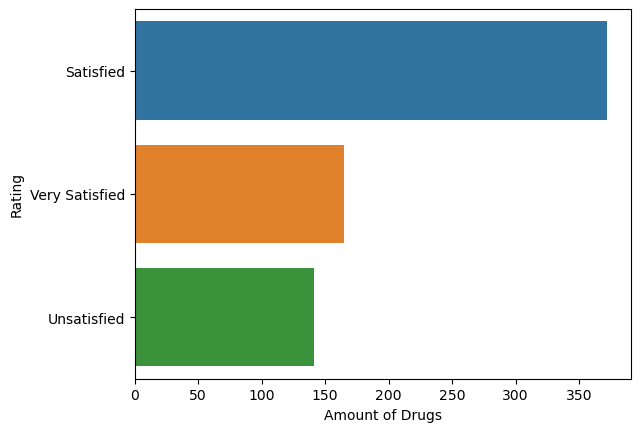

In [188]:
sns.barplot(data=lev1, x='Amount of Drugs', y='Rating')

<Axes: xlabel='Amount of Drugs', ylabel='Rating'>

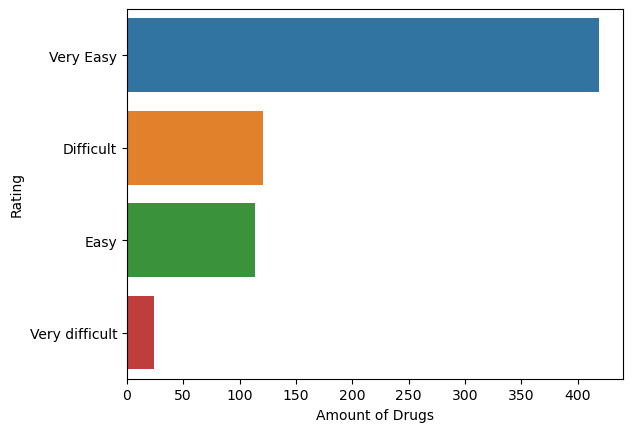

In [189]:
sns.barplot(data=lev2, x='Amount of Drugs', y='Rating')

<Axes: xlabel='Amount of Drugs', ylabel='Rating'>

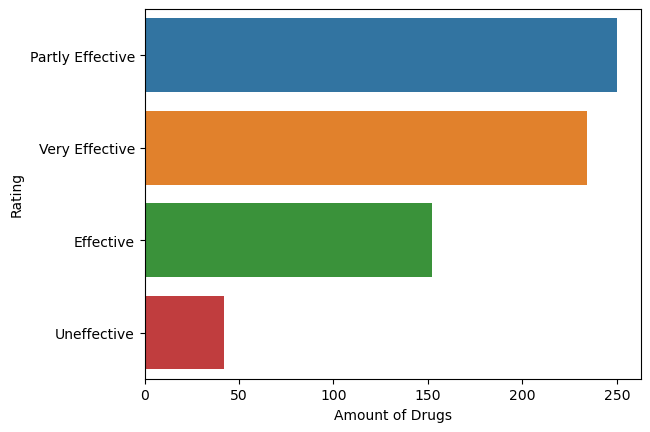

In [190]:
sns.barplot(data=lev3, x='Amount of Drugs', y='Rating')

**How many OTC drugs prescriped as off label, which is illegal :)**

In [206]:
df.head()

,Condition,Generic_Name,Ease_Of_Use,Effectiveness,Dosage_Form,Indication,Price,Reviews,Satisfaction,Prescription_Type,level_of_effectiveness,level_of_difficulty,level_of_Satisfaction
0,Acute Bacterial Sinusitis,Amoxicillin,3.9,3.7,Capsule,On Label,12.6,86.3,3.2,RX,Effective,Easy,Satisfied
1,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,3.5,3.3,Liquid (Drink),Off Label,287.4,43.0,2.6,RX,Partly Effective,Easy,Satisfied
2,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,3.1,3.0,Tablet,On Label,70.6,267.3,2.2,RX,Partly Effective,Difficult,Unsatisfied
3,Acute Bacterial Sinusitis,Ampicillin,2.0,3.0,Capsule,On Label,12.6,1.0,1.0,RX,Partly Effective,Difficult,Unsatisfied
4,Acute Bacterial Sinusitis,Ampicillin,3.2,3.0,Tablet,On Label,125.2,15.0,3.0,RX,Partly Effective,Difficult,Satisfied


In [217]:
fig1= px.histogram(df,x= 'Prescription_Type',nbins=5,color='Indication')
fig1.show()

In [210]:
# That means: 27 OTC precriptions prescriped illegally 

**Which is more effective, OTC drugs or Rx?**

In [219]:
fig2= px.histogram(df,x= 'level_of_effectiveness',nbins=5,color='Prescription_Type')
fig2.show()

In [220]:
# That means: Rx is more effective

**Don't forget to give an information about the least reviewd drugs**

In [225]:
least_review = df.sort_values(by='Reviews', ascending=False,).tail(15)

least_review

,Condition,Generic_Name,Ease_Of_Use,Effectiveness,Dosage_Form,Indication,Price,Reviews,Satisfaction,Prescription_Type,level_of_effectiveness,level_of_difficulty,level_of_Satisfaction
630,Meniere'S Disease,Dimenhydrinate,5.0,5.0,Tablet,Off Label,4.0,1.0,5.0,OTC,Very Effective,Very Easy,Very Satisfied
292,Fever,Chlorpheniramine-Acetaminophen,4.0,3.5,Other,On Label,10.5,1.0,1.5,OTC,Effective,Very Easy,Unsatisfied
51,Atopic Dermatitis,Hydrocortisone Acetate,4.0,2.0,Cream,On Label,14.6,1.0,2.0,RX/OTC,Partly Effective,Very Easy,Unsatisfied
626,Impetigo,Mupirocin,4.0,1.0,Other,On Label,365.0,1.0,1.0,RX,Uneffective,Very Easy,Unsatisfied
111,Bacterial Urinary Tract Infection,Cefazolin In Dextrose (Iso-Os),3.0,2.0,Injection,On Label,6.0,1.0,1.0,RX,Partly Effective,Difficult,Unsatisfied
27,Atopic Dermatitis,Desonide-Emollient Combo No 28,4.0,4.0,Cream,On Label,90.0,1.0,4.0,RX,Very Effective,Very Easy,Very Satisfied
113,Bacterial Urinary Tract Infection,Cefepime,2.0,4.0,Capsule,On Label,78.0,1.0,4.0,RX,Very Effective,Difficult,Very Satisfied
362,Flatulence,"Simethicone, Alpha-D-Galactosidase",5.0,3.0,Liquid (Drink),On Label,11.9,1.0,3.0,Unkown,Partly Effective,Very Easy,Satisfied
55,Atopic Dermatitis,Hydrocortisone Sod Succ (PF),5.0,4.0,Injection,On Label,50.0,1.0,4.0,RX,Very Effective,Very Easy,Very Satisfied
299,Fever,"Dextromethorphan-Guaifenesin, Guaifenesin, Cpm...",2.0,2.0,Liquid (Drink),On Label,12.0,1.0,1.0,OTC,Partly Effective,Difficult,Unsatisfied


# Categorical Data Plot

In [228]:
px.violin(df, y='Effectiveness',box=True)

In [229]:
px.violin(df, y='Satisfaction',box=True)

In [231]:
px.violin(df, y='Price',box=True)